#IMAGE CLASSIFICASION

*   Nama : Ahmad Khoiru Shofa
*   username : shofa2105
*   e-mail : khoiruahmad09@gmail.com

##UNZIP DATA

In [ ]:
import os
import zipfile

# unzip dataset yang masih berbentuk file zip
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/rockpaperscissors_2.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()

In [ ]:
train_dir = '/content/rockpaperscissors/train'
validation_dir = '/content/rockpaperscissors/validation'

train_data_rock = os.listdir(train_dir + '/rock/')
train_data_paper = os.listdir(train_dir + '/paper/')
train_data_scissors = os.listdir(train_dir + '/scissors/')

##PRE-PROCESSING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# melakukan image augmentation pada dataset untuk menambah variasi data
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
                                   #dtype=tf.float32

test_datagen = ImageDataGenerator( rescale = 1.0/255.,)
                                   #dtype=tf.float32)

# melakukan data generator untuk membaca dataset training di setiap label
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224))

# # melakukan data generator untuk membaca dataset testing di setiap label
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical',
                                                          target_size = (224, 224))

Found 875 images belonging to 3 classes.
Found 1313 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model

In [ ]:
#@title Pilih Pretrained Model :  { display-mode: "both" }
Model = "MobileNet" #@param ["VGG16", "MobileNet", "InceptionNet", "ResNet"]

# Pilihan pretrained model yang dapat digunakan di sesi ini
if Model == "VGG16":
  base_model = VGG16(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

elif Model == "ResNet50":
  base_model = ResNet50(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

elif Model == "MobileNet":
  base_model = MobileNet(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

else:
  base_model = InceptionV3(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)

print("Anda akan menggunakan model : ", Model)

# membuat base model tidak diikutkan proses training
for layer in base_model.layers:
  layer.trainable = False

17225924/17225924 [==============================] - 0s 0us/step
Anda akan menggunakan model :  MobileNet


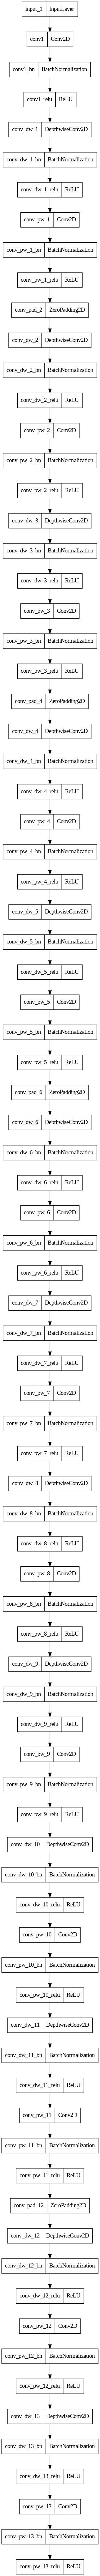

In [ ]:
# membuat visualisasi plot arsetektur yang telah kita pilih
plot_model(base_model, to_file='my_base_model.png')

In [ ]:
# kita juga bisa menggunakan .summary() untuk menampilkan arsitektur kita
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
import tensorflow as tf


x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.15)(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    validation_steps=validation_generator.n // validation_generator.batch_size,
                    epochs=10)


Epoch 1/10
27/27 [==============================] - 135s 5s/step - loss: 0.5538 - accuracy: 0.7853 - val_loss: 0.0765 - val_accuracy: 0.9832
Epoch 2/10
27/27 [==============================] - 131s 5s/step - loss: 0.1422 - accuracy: 0.9585 - val_loss: 0.0399 - val_accuracy: 0.9909
Epoch 3/10
27/27 [==============================] - 132s 5s/step - loss: 0.0586 - accuracy: 0.9846 - val_loss: 0.0247 - val_accuracy: 0.9924
Epoch 4/10
27/27 [==============================] - 131s 5s/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.0151 - val_accuracy: 0.9977
Epoch 5/10
27/27 [==============================] - 130s 5s/step - loss: 0.0251 - accuracy: 0.9929 - val_loss: 0.0163 - val_accuracy: 0.9970
Epoch 6/10
27/27 [==============================] - 106s 4s/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.0160 - val_accuracy: 0.9947
Epoch 7/10
27/27 [==============================] - 131s 5s/step - loss: 0.0393 - accuracy: 0.9834 - val_loss: 0.0108 - val_accuracy: 0.9977
Epoch 8/10
27

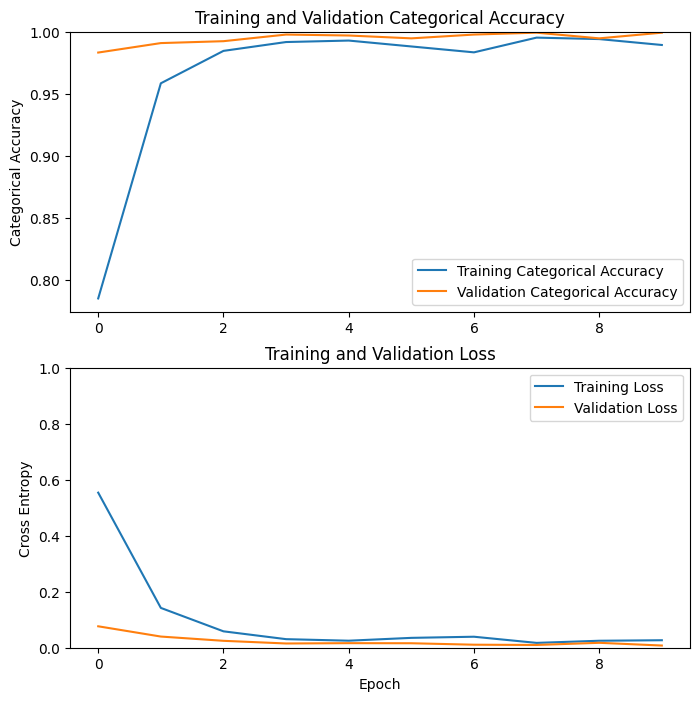

In [ ]:
import matplotlib.pyplot as plt

# Mengganti 'accuracy' menjadi 'categorical_accuracy'
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Categorical Accuracy')
plt.plot(val_acc, label='Validation Categorical Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Categorical Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Categorical Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


42/42 [==============================] - 71s 2s/step


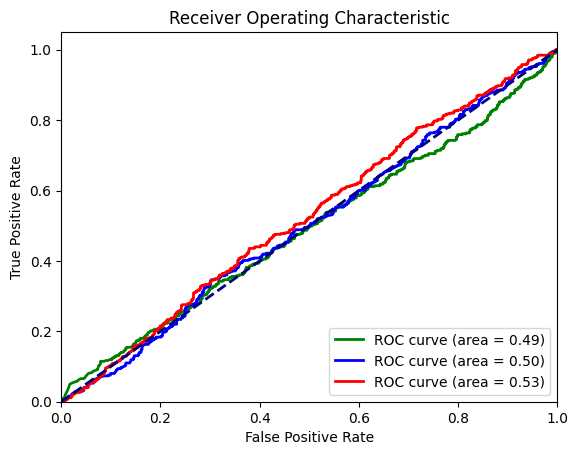

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Prediksi dari model
preds = model.predict(validation_generator, verbose=1)

# Mengubah label ke format one-hot encoding
true_labels = label_binarize(validation_generator.classes, classes=np.arange(4))

# Menghitung ROC AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves untuk setiap kelas
plt.figure()
lw = 2
colors = [ 'green', 'blue', 'red']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Saving Rock-paper-scissors_(scissors).png to Rock-paper-scissors_(scissors).png


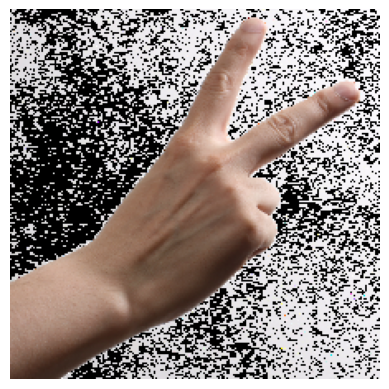

1/1 [==============================] - 0s 55ms/step

 Ini adalah scissors


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

uploaded = files.upload()

for fn in uploaded.keys():

    # Memprediksi gambar
    path = '/content/' + fn
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Memprediksi kelas untuk gambar
    classes = model.predict(x)

    # Menggunakan argmax untuk menentukan kelas yang memiliki probabilitas tertinggi
    predicted_class = np.argmax(classes)

    # Menampilkan hasil prediksi sesuai dengan kelas
    if predicted_class == 0:
        print("\n Ini adalah paper")
    elif predicted_class == 1:
        print("\n Ini adalah rock")
    elif predicted_class == 2:
        print("\n Ini adalah scissors")
    else:
        print("\n Tidak dapat menentukan kelas")